<a href="https://colab.research.google.com/github/darshanbeniwal/Analyzing_Astro_Data_w_Py_GLA_IUCAA_2023/blob/main/GLA_1_Mock_Data_Fit_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load Mock dataset

In [ ]:
x_mock=np.array((1.0,2.0,3.0,4.0,5.0))
y_mock=np.array((2.3,4.1,6.2,8.1,10.0))
err_y_mock=np.array((0.08, 0.12, 0.2 , 0.16, 0.28))

#Plot datapoint

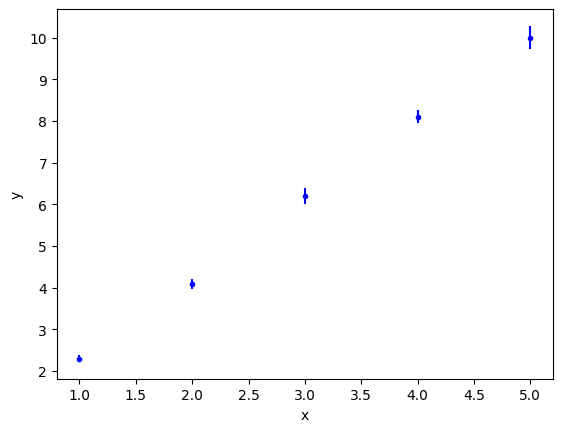

In [ ]:
plt.errorbar(x_mock,y_mock,err_y_mock,fmt='b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Perform Chi-square analysis

In [ ]:
a_arr=[]
b_arr=[]
chi_sq_arr=[]
for a in np.arange(0,1,0.0005):
    for b in np.arange(0.0,3,0.0005):
      chi_sq=0
      for i in range(0,len(x_mock)):
          y_th=a+b*x_mock[i]
          chi_sq1=((y_mock[i]-y_th)/err_y_mock[i])**2
          chi_sq=chi_sq+chi_sq1
      a_arr.append(a)
      b_arr.append(b)
      chi_sq_arr.append(chi_sq)
 #This cell will take around 2 minutes.

#Save Arrays in a Text file

In [ ]:
np.savetxt('store_file.txt',np.transpose([a_arr,b_arr,chi_sq_arr]),fmt='%10.5f',newline='\n',delimiter=' ')

#35sec

#Load text file using Pandas

In [ ]:
df = pd.read_csv ('store_file.txt',sep="\s+",names=["a","b","chi2"])


In [ ]:
df

,a,b,chi2
0,0.0000,0.0000,6793.32444
1,0.0000,0.0005,6790.02764
2,0.0000,0.0010,6786.73164
3,0.0000,0.0015,6783.43645
4,0.0000,0.0020,6780.14205
...,...,...,...
59999995,0.9999,2.9975,2783.00050
59999996,0.9999,2.9980,2785.09851
59999997,0.9999,2.9985,2787.19733
59999998,0.9999,2.9990,2789.29695


#Find minimim $\chi^2$ values

In [ ]:
df_min=df.loc[df['chi2'].idxmin()]
df_min

a       0.34100
b       1.93150
chi2    1.01585
Name: 4095863, dtype: float64

#Estimate Confidence Intervals

##$68.27\%$ confidence level

In [ ]:
df_1_sig = df[(round(df['chi2'],2) ==round (df_min[2]+2.3,2))]
df_1_sig

,a,b,chi2
2127979,0.1770,1.9895,3.32232
2127980,0.1770,1.9900,3.31896
2127981,0.1770,1.9905,3.31640
2127986,0.1770,1.9930,3.31563
2127987,0.1770,1.9935,3.31788
...,...,...,...
6069742,0.5055,1.8710,3.31650
6069743,0.5055,1.8715,3.31707
6069744,0.5055,1.8720,3.31843
6069745,0.5055,1.8725,3.32060


##Plot $68.27\%$ Confidence Level

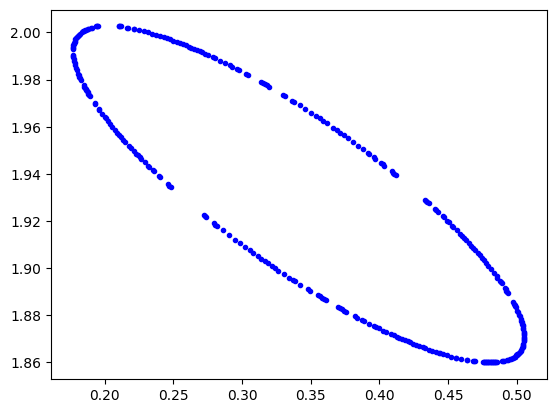

In [ ]:
plt.plot(df_1_sig['a'],df_1_sig['b'],'b.')

In [ ]:
df_1_sig['a'].std()

0.11823058409983046

##$95.45\%$ confidence level

In [ ]:
df_2_sig = df[(round(df['chi2'],2) ==round (df_min[2]+6.18,2))]
df_2_sig

,a,b,chi2
868056,0.0720,2.0280,7.20173
868057,0.0720,2.0285,7.19812
868058,0.0720,2.0290,7.19531
868064,0.0720,2.0320,7.19526
868065,0.0720,2.0325,7.19805
...,...,...,...
7329665,0.6105,1.8325,7.19668
7329666,0.6105,1.8330,7.19750
7329667,0.6105,1.8335,7.19912
7329668,0.6105,1.8340,7.20155


##Plot $95.45\%$ Confidence Level

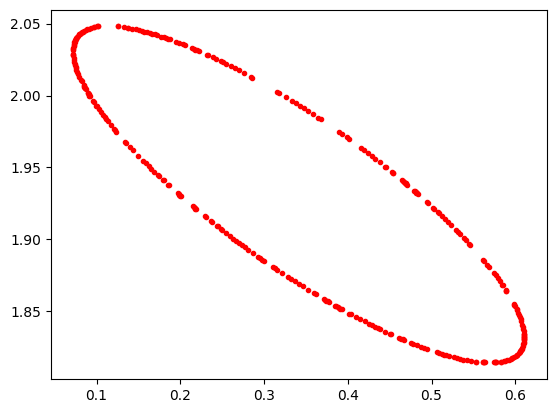

In [ ]:
plt.plot(df_2_sig['a'],df_2_sig['b'],'r.')

##$99.70\%$ confidence level

In [ ]:
df_3_sig = df[(round(df['chi2'],2) ==round (df_min[2]+11.83,2))]
df_3_sig

,a,b,chi2
4045,0.0000,2.0225,12.84654
10044,0.0005,2.0220,12.85260
40184,0.0030,2.0920,12.85114
52038,0.0040,2.0190,12.84618
58037,0.0045,2.0185,12.85463
...,...,...,...
8559600,0.7130,1.8000,12.84536
8559601,0.7130,1.8005,12.85458
8565581,0.7135,1.7905,12.85189
8565582,0.7135,1.7910,12.84618


##Plot $99.7\%$ Confidence Level

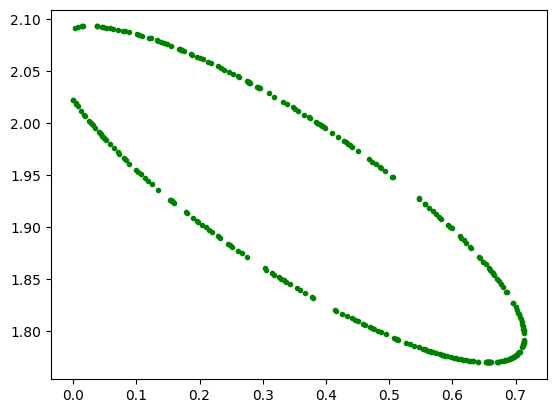

In [ ]:
plt.plot(df_3_sig['a'],df_3_sig['b'],'g.')

##Print and Save Final Output

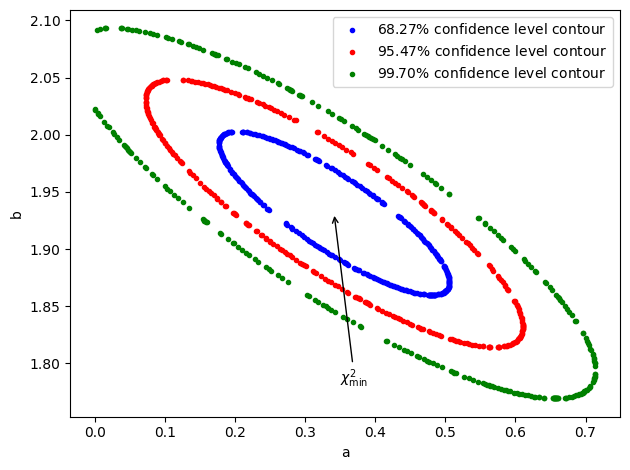

In [ ]:
plt.xlabel('a')
plt.ylabel("b")
plt.plot(df_1_sig['a'], df_1_sig['b'],'b.',label='$68.27\%$ confidence level contour')
plt.plot(df_2_sig['a'], df_2_sig['b'],'r.',label='$95.47\%$ confidence level contour')
plt.plot(df_3_sig['a'], df_3_sig['b'],'g.',label='$99.70\%$ confidence level contour')
plt.legend(loc="upper right")
plt.annotate("$\chi^2_{\mathrm{min}}$", xy=(df_min[0],df_min[1]), xytext=(0.35, 1.783), arrowprops=dict(arrowstyle="->"))
plt.tight_layout()
plt.savefig('Linear_model_fit_mock_data_Basic.pdf', format='pdf', dpi=1200)
